A partir del dataset que se propone, zoo. 

+info: https://www.kaggle.com/uciml/zoo-animal-classification?select=zoo.csv

Responde a las preguntas presentadas

**PREGUNTAS**: 
1. Inspeccionar dataset
2. Estadisticas
3. Valores Nan (missing values)
4. Varianzas
5. Correlacion ¿Cuales son las variables que más correlacionadas están con el target? 
6. ¿Qué variable la correlación máxima y cual es su valor?
7. ¿Se observa alguna diferencia al aplicar Spearman en lugar de Pearson? ¿ A qué es debido?


8. Aplicando backward elimination, ¿Con qué variables nos quedamos?

9. ¿Cuál es el número óptimo de variables a tener en cuenta usando el método de RFE, cuales son? 

10. ¿Cuantas variables elimina RIDGE y cúales son?¿Y LASSO?

11. ¿Usando 2 componentes, que peso tiene la variable "domestic" a la componente 1?

12. ¿Cuantos coeficientes se obtienen en LDA, razona la respuesta, y cuales son sus valores?

# 1. Inspeccionar dataset


In [26]:
import numpy as np
import pandas as pd

In [27]:
df = pd.read_csv('zoo.csv',header=0)
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


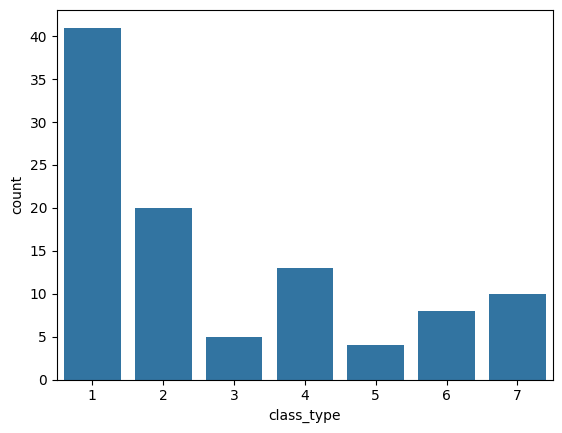

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ejemplo de visualización
sns.countplot(x='class_type', data=df)
plt.show()


# 2. Estadísticas

In [29]:
statistics = df.describe()
statistics

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [30]:
moda = df.mode().iloc[0]
moda

animal_name    frog
hair              0
feathers          0
eggs              1
milk              0
airborne          0
aquatic           0
predator          1
toothed           1
backbone          1
breathes          1
venomous          0
fins              0
legs              4
tail              1
domestic          0
catsize           0
class_type        1
Name: 0, dtype: object

# 3. Valores Nan (missing values)

In [31]:
print(df.isnull().sum())

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64


<p style = color:orange>No hay valores nulos por lo que no hay nada que tratar</p>

# 4. Varianzas

In [32]:
df_numeric = df.select_dtypes(include=['number'])

varianzas = df_numeric.var()

varianzas

hair          0.246931
feathers      0.160396
eggs          0.245347
milk          0.243564
airborne      0.182970
aquatic       0.231683
predator      0.249505
toothed       0.241584
backbone      0.147921
breathes      0.166337
venomous      0.073663
fins          0.141386
legs          4.134653
tail          0.193069
domestic      0.113267
catsize       0.248317
class_type    4.421386
dtype: float64

# 5. Correlacion ¿Cuales son las variables que más correlacionadas están con el target? 

In [33]:
df = df.drop(["animal_name"], axis = 1)
X = df.drop(["class_type"],  axis = 1)   
y = df["class_type"]

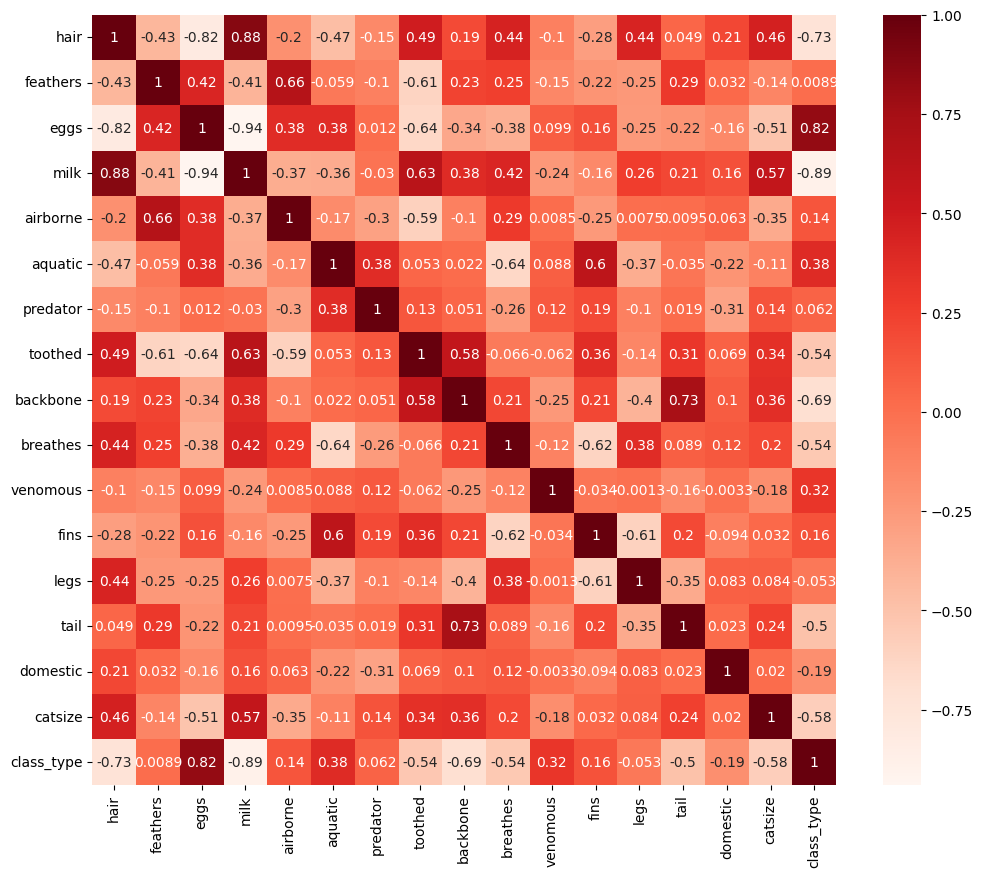

In [34]:
plt.figure(figsize=(12,10))
cor_spearman = df.corr("spearman")
sns.heatmap(cor_spearman, annot=True, cmap=plt.cm.Reds)
plt.show()

In [57]:
cor_class_type = abs(cor_spearman['class_type']).sort_values(ascending=False)
cor_class_type_absolute = cor_spearman['class_type'].sort_values(ascending=False)
print("\033[93mCorrelaciones:\033[0m\n",cor_class_type,"\n")
print("\033[93mCorreclaciones absolutas:\033[0m\n",cor_class_type_absolute)

Correlaciones:
 class_type    1.000000
milk          0.886024
eggs          0.819282
hair          0.732588
backbone      0.690483
catsize       0.578225
breathes      0.538258
toothed       0.535235
tail          0.495965
aquatic       0.381848
venomous      0.317639
domestic      0.190137
fins          0.156947
airborne      0.138795
predator      0.061564
legs          0.053203
feathers      0.008877
Name: class_type, dtype: float64 

Correclaciones absolutas:
 class_type    1.000000
eggs          0.819282
aquatic       0.381848
venomous      0.317639
fins          0.156947
airborne      0.138795
predator      0.061564
feathers      0.008877
legs         -0.053203
domestic     -0.190137
tail         -0.495965
toothed      -0.535235
breathes     -0.538258
catsize      -0.578225
backbone     -0.690483
hair         -0.732588
milk         -0.886024
Name: class_type, dtype: float64


In [54]:
print("\033[93mEstas son la variables que están más correlacionadas con el target:\033[0m")
relevant_features = cor_class_type[cor_class_type>0.5]
relevant_features

Estas son la variables que están más correlacionadas con el target:


class_type    1.000000
milk          0.886024
eggs          0.819282
hair          0.732588
backbone      0.690483
catsize       0.578225
breathes      0.538258
toothed       0.535235
Name: class_type, dtype: float64

# 6. ¿Qué variable tiene la correlación máxima y cual es su valor?

<p style = color:orange>Tran visualizar los datos proporcionados por los algoritmos de correlación podemos observar que la variable que tiene la correlación máxima es milk con 0.886024</p>

# 7. ¿Se observa alguna diferencia al aplicar Spearman en lugar de Pearson? ¿ A qué es debido?

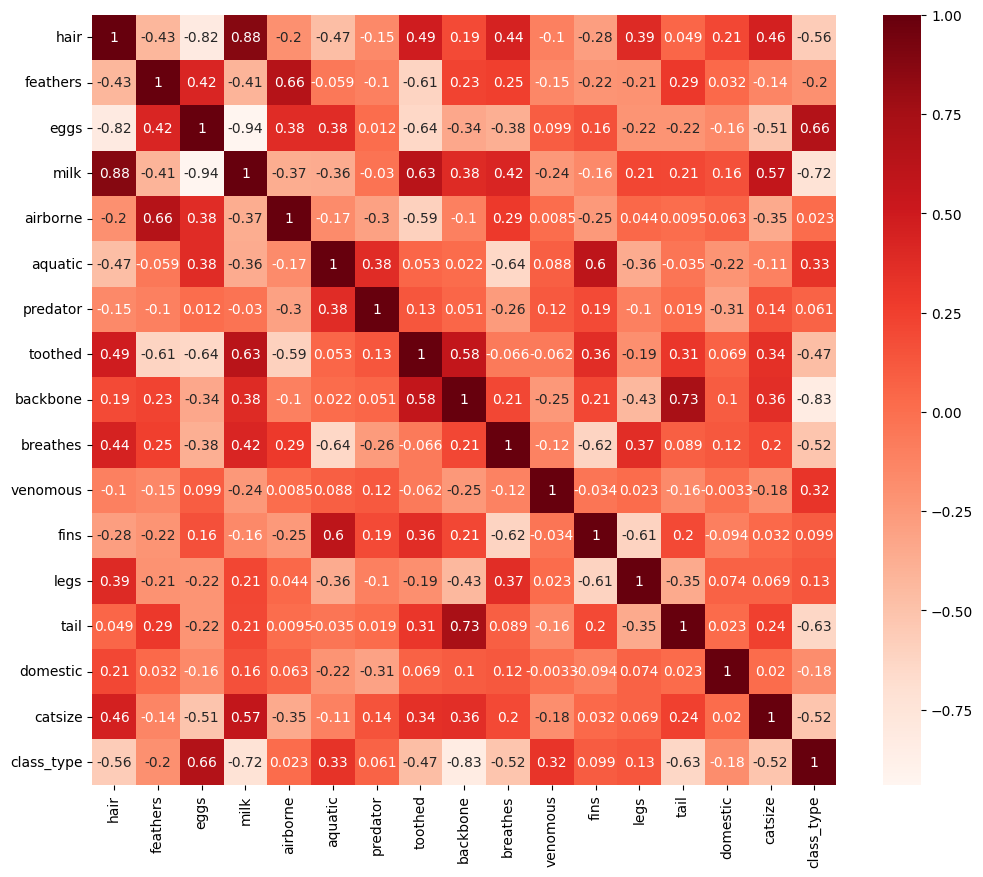

In [37]:
plt.figure(figsize=(12,10))
cor_pearson = df.corr()
sns.heatmap(cor_pearson, annot=True, cmap=plt.cm.Reds)
plt.show()

In [58]:
cor_pearson_class_type = abs(cor_pearson['class_type']).sort_values(ascending=False)
cor_spearman_class_type = abs(cor_spearman['class_type']).sort_values(ascending=False)
relevant_features_pearson = cor_pearson_class_type[cor_class_type>0.5]
relevant_features_spearman = cor_spearman_class_type[cor_class_type>0.5]
print("\033[93mCorrelación de Pearson:\033[0m\n", relevant_features_pearson, "\n")
print("\033[93mCorrelación de Spearman:\033[0m\n", relevant_features_spearman)

Correlación de Pearson:
 class_type    1.000000
backbone      0.828845
milk          0.723683
eggs          0.661825
hair          0.562384
catsize       0.521030
breathes      0.519308
toothed       0.471527
Name: class_type, dtype: float64 

Correlación de Spearman:
 class_type    1.000000
milk          0.886024
eggs          0.819282
hair          0.732588
backbone      0.690483
catsize       0.578225
breathes      0.538258
toothed       0.535235
Name: class_type, dtype: float64


<p style = color:orange>Como se puede observar, existe una pequeña diferencia en los resultados de la correlación al aplicar Spearman en lugar de Pearson. Esto es debido a que los algoritmos que utilizan son algo distintos.</p>
<p style = color:orange> En este caso el algoritmo de Spearman ha logrado sacar una correlación mayor que el de Pearman.</p>

# 8. Aplicando backward elimination, ¿Con qué variables nos quedamos?